In [83]:
import pandas as pd
import numpy as np


df_quality = pd.read_csv("..\datasets\cyprus_air_quality\Data_Daily_All.csv")
idx = ['date','station_code']
col = ['pollutant_code']
val = ['mean_pollutant_value']

## pivot data by Date, Station Code and Pollutant
df_quality = df_quality.pivot(index=idx, columns= col, values=val)
#.reset_index()
#df_quality.columns = df_quality.columns.droplevel(0)
#(index='fff', columns='bbb', values='baa')

In [84]:
df_quality

mean_pollutant_value                         \
pollutant_code                          C6H6          CO         NO   
date       station_code                                               
2018-01-01 1                        1.587500  667.820833  21.095833   
           2                             NaN  372.066667   4.075000   
           3                        4.220000  534.208333   9.179167   
           5                        1.158333  321.662500   3.604167   
           8                        0.387500         NaN   1.870833   
...                                      ...         ...        ...   
2021-12-31 8                        0.427917         NaN   0.872500   
           9                        0.131818  282.723333        NaN   
           14                       0.150833  191.503333   0.180556   
           15                       0.515000  227.014583   2.739167   
           16                            NaN  290.978750   1.018333   

                                                                    
pollutant_code                 NO2        NOX         O3       SO2  
date       station_code                                             
2018-01-01 1             27.587500  59.904167  33.233333  1.954167  
           2             18.150000  24.391667  48.358333  0.705556  
           3             27.820833  41.891667  36.787500  1.891667  
           5             16.279167  21.775000  53.954167  0.575000  
           8              7.804167  10.683333  54.775000  1.316667  
...                            ...        ...        ...       ...  
2021-12-31 8              6.067917   7.409583  63.270000  1.314583  
           9                   NaN        NaN  74.033636  1.812857  
           14             9.811667   9.972083  63.858750  0.643043  
           15            10.904167  15.104583  69.130417  0.680833  
           16            10.190833  11.753333  69.614583  4.921667  

[13149 rows x 7 columns]

In [85]:
df_traffic = pd.read_csv("..\datasets\cyprus_airport_air_traffic\csv\CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv")
df_traffic

,date,total_flights,airport,station_code
0,2018-01-01,83.0,Larnaka,5
1,2018-01-02,163.0,Larnaka,5
2,2018-01-03,155.0,Larnaka,5
3,2018-01-04,142.0,Larnaka,5
4,2018-01-05,148.0,Larnaka,5
...,...,...,...,...
2917,2021-12-27,44.0,Pafos,15
2918,2021-12-28,70.0,Pafos,15
2919,2021-12-29,66.0,Pafos,15
2920,2021-12-30,47.0,Pafos,15


In [88]:
#pd.merge(df_traffic, df_quality,  how='left', left_on='[date,station_code]', right_on = '[date,station_code]')
df_quality_traffic = df_quality.merge(df_traffic, on=["date","station_code"])
df_quality_traffic

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


,date,station_code,"(mean_pollutant_value, C6H6)","(mean_pollutant_value, CO)","(mean_pollutant_value, NO)","(mean_pollutant_value, NO2)","(mean_pollutant_value, NOX)","(mean_pollutant_value, O3)","(mean_pollutant_value, SO2)",total_flights,airport
0,2018-01-01,5,1.158333,321.662500,3.604167,16.279167,21.775000,53.954167,0.575000,83.0,Larnaka
1,2018-01-01,15,1.108333,448.179167,2.479167,10.745833,14.545833,58.466667,1.708333,16.0,Pafos
2,2018-01-02,5,1.800000,439.441667,16.265217,35.441667,59.308333,33.866667,2.941667,163.0,Larnaka
3,2018-01-02,15,0.545833,358.216667,2.045833,6.641667,9.779167,71.208333,1.775000,25.0,Pafos
4,2018-01-03,5,1.450000,418.062500,12.843478,25.508333,44.358333,38.300000,1.075000,155.0,Larnaka
...,...,...,...,...,...,...,...,...,...,...,...
2917,2021-12-29,15,1.377500,246.451667,10.560417,30.457917,46.647917,57.542083,1.048571,66.0,Pafos
2918,2021-12-30,5,0.936667,320.470417,8.043333,19.402917,31.734167,64.088750,3.497917,105.0,Larnaka
2919,2021-12-30,15,0.500417,191.602083,3.570000,11.526250,17.001250,70.529583,0.229474,47.0,Pafos
2920,2021-12-31,5,1.646250,456.147083,11.905000,30.239583,48.491250,48.926667,5.430417,69.0,Larnaka


In [58]:
df
Dpivot(self, index=None, columns=None, values=None)
df_quality_traffic

NameError: name 'self' is not defined

In [29]:
# add visualization libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [30]:
#df_quality_traffic.describe() 
df_quality_traffic.groupby(['station_name_en','pollutant_code']).mean()

Unnamed: 0  station_code  \
station_name_en           pollutant_code                               
Larnaka - Traffic Station C6H6            41627.187543           5.0   
                          CO              43186.088980           5.0   
                          NO              42057.469541           5.0   
                          NO2             43616.364819           5.0   
                          NOX             42986.882957           5.0   
                          O3              44595.501027           5.0   
                          SO2             43000.212183           5.0   
Pafos - Traffic Station   C6H6            43962.856947          15.0   
                          CO              43362.611910          15.0   
                          NO              42811.219713          15.0   
                          NO2             43034.247775          15.0   
                          NOX             42726.261465          15.0   
                          O3              42881.939083          15.0   
                          SO2             41966.138261          15.0   

                                          pollutant_id  mean_pollutant_value  \
station_name_en           pollutant_code                                       
Larnaka - Traffic Station C6H6                    45.0              0.985315   
                          CO                       6.0            373.863881   
                          NO                       1.0              7.613247   
                          NO2                      2.0             24.350633   
                          NOX                      3.0             35.978237   
                          O3                       5.0             63.890238   
                          SO2                      4.0              3.436789   
Pafos - Traffic Station   C6H6                    45.0              0.591301   
                          CO                       6.0            297.165247   
                          NO                       1.0              3.901547   
                          NO2                      2.0             13.245998   
                          NOX                      3.0             19.205960   
                          O3                       5.0             78.861970   
                          SO2                      4.0              1.451168   

                                          total_flights  
station_name_en           pollutant_code                 
Larnaka - Traffic Station C6H6               152.111567  
                          CO                 152.111567  
                          NO                 152.111567  
                          NO2                152.111567  
                          NOX                152.111567  
                          O3                 152.111567  
                          SO2                152.111567  
Pafos - Traffic Station   C6H6                58.804928  
                          CO                  58.804928  
                          NO                  58.804928  
                          NO2                 58.804928  
                          NOX                 58.804928  
                          O3                  58.804928  
                          SO2                 58.804928

##### Check the correlation between pollutants and find the most related to traffic in order to be used for further analysis
The results have there is an interesting correlation around between round to 20-30% between air traffic and pollutants

,pollutant,correlation
5,O3,-0.133582
6,C6H6,0.119463
4,NO,0.145394
2,CO,0.222790
1,NOX,0.237071
3,NO2,0.294627
0,SO2,0.370445


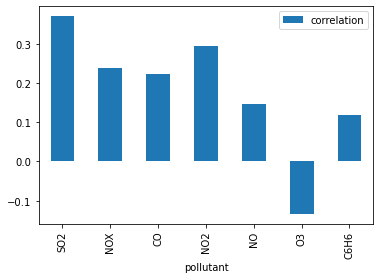

In [56]:
col_val = ['mean_pollutant_value','total_flights']
#&(df_quality_traffic['station_name_en'] == 'Larnaka - Traffic Station')

pollutants = df_quality_traffic.pollutant_code.unique()
pvt = []
for p in pollutants:
    dset = df_quality_traffic.loc[(df_quality_traffic['pollutant_code'] == p)].copy()
    corr = dset[col_val].corr(method='pearson',min_periods=3)['mean_pollutant_value'].total_flights
    pvt.append([p,corr])

pvt = pd.DataFrame(pvt, columns=['pollutant','correlation'])
pvt.set_index('pollutant').plot.bar()
pvt.sort_values('correlation')

In [57]:
df_quality_traffic[col_val].corr().style.background_gradient(cmap='coolwarm')

,mean_pollutant_value,total_flights
mean_pollutant_value,1.000000,0.037046
total_flights,0.037046,1.000000
